In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ext_tcasado/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ext_tcasado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ext_tcasado/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [51]:
data = pd.read_csv('train.csv')

In [52]:
data['length'] = data['text'].str.len()
data.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


**Limpieza de texto**

In [53]:
data['keyword'].fillna('no keyword', inplace = True)  #agregado de mora
data['location'].fillna('no location', inplace = True) #agregado de mora
data['keyword'] = data['keyword'].str.replace('%20', ' ')

In [54]:
data['clean_text'] = data['text'].str.lower()                                         #juli

#Saco http y me quedo sólo con letras y espacios
def only_letters(tweet):
    tweet = re.sub(r'http\S*', '', tweet)
    tweet = re.sub(r'[^a-z\s]', '', tweet)
    return tweet

In [55]:
data['clean_text'] = data['clean_text'].apply(only_letters)        #juli
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,our deeds are the reason of this earthquake ma...
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,all residents asked to shelter in place are be...
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfires evacuation orders in...
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,just got sent this photo from ruby alaska as s...


In [56]:
#Tokenización
from nltk.tokenize import word_tokenize                           #juli
data['clean_text'] = data['clean_text'].apply(word_tokenize)
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,"[our, deeds, are, the, reason, of, this, earth..."
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,"[all, residents, asked, to, shelter, in, place..."
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfires, evacuation, order..."
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,"[just, got, sent, this, photo, from, ruby, ala..."


In [57]:
#Elimino stopwords                                                                   #Juli
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

def filter_stopwords(tokenized_text):
    not_stopwords=[]
    for w in tokenized_text:
        if w not in stop_words:
            not_stopwords.append(w)
    return not_stopwords

In [58]:
data['clean_text'] = data['clean_text'].apply(filter_stopwords)                         #juli
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,"[residents, asked, shelter, place, notified, o..."
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfires, evacuation, order..."
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [59]:
#Lemmatization                                                                       #juli
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tweet(tweet):
    lemmatized_words = []
    for word in tweet:
        lemmatized_words.append(lemmatizer.lemmatize(word))
    return lemmatized_words

In [60]:
data['clean_text'] = data['clean_text'].apply(lemmatize_tweet)                         #juli
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,"[deed, reason, earthquake, may, allah, forgive..."
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,"[forest, fire, near, la, ronge, sask, canada]"
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,"[resident, asked, shelter, place, notified, of..."
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,"[people, receive, wildfire, evacuation, order,..."
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [61]:
data['clean_text'] = data['clean_text'].apply(lambda text:' '.join(text))                        #juli
data.head()

,id,keyword,location,text,target,length,clean_text
0,1,no keyword,no location,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,no keyword,no location,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,no keyword,no location,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified officer ...
3,6,no keyword,no location,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation order calif...
4,7,no keyword,no location,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire pour...


In [62]:
#USA y United States son sinónimos, vamos a reemplazar United States por USA                   #yussef
data['location']= np.where((data['location']=='United States'), 'USA', data['location'])

**Comienzo análisis**

In [63]:
data_grouped = data.groupby('target')        #CAMBIAR DATA POR TWEETS Y TARGET POR VERACITY
#new_column_name = {"target":"veracity"}
#tweets = tweets.rename(columns = new_column_name)    DEBERÍAMOS PONER ESO
false_tweets = data_grouped.get_group(0)
true_tweets = data_grouped.get_group(1)

#Nos fijamos cuantos tweets son verdaderos y cuantos falsos     #tomi

data_grouped['id'].count()

target
0    4342
1    3271
Name: id, dtype: int64

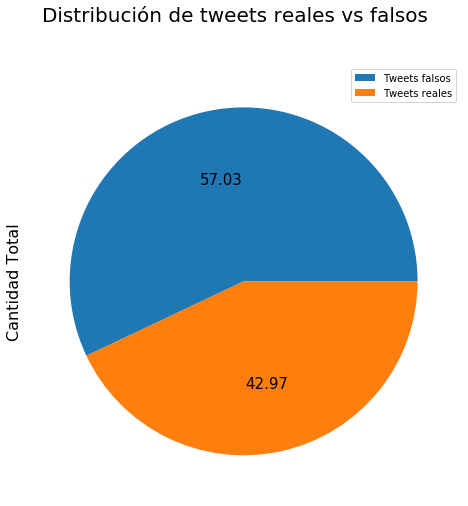

In [64]:
#Graficamos para ver la distribucion de tweets reales contra falsos 
data_grouped = data_grouped.agg({'target':'count'})
data_grouped.columns = ['Cantidad Total']

labels = ['Tweets falsos','Tweets reales']
title = 'Distribución de tweets reales vs falsos'
fig, ax= plt.subplots()
fig.suptitle(title, fontsize=20)
plt.ylabel('Cantidad Total', fontsize=16)
data_grouped['Cantidad Total'].plot(kind='pie',figsize=(10,8),autopct='%.2f',labels=['',''],fontsize=15)
ax.legend(labels);

**Análisis de longitud de tweets**

In [65]:
bins = range(0,160,10)

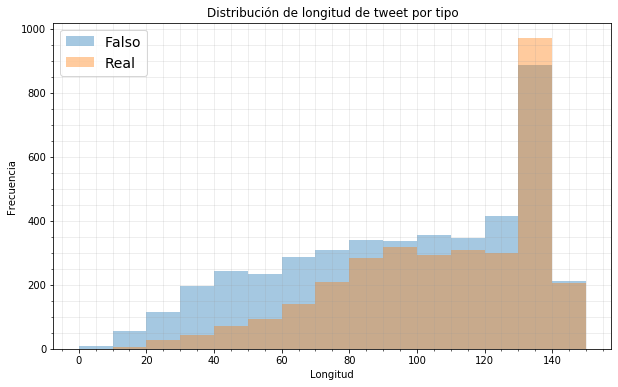

In [66]:
fig = plt.gcf()     #ver bien que colores usar  ¿pasteles?
fig.set_size_inches(10, 6)

sns.distplot(false_tweets['length'],  kde=False, label='Falso', bins=bins)
sns.distplot(true_tweets['length'],  kde=False,label='Real', bins=bins)

plt.legend(prop={'size': 14})
plt.title('Distribución de longitud de tweet por tipo')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')

plt.minorticks_on()
plt.grid(which='both', color='#999999', linestyle='-', alpha=0.2)
#plt.show()
plt.savefig('Histogram length by type')

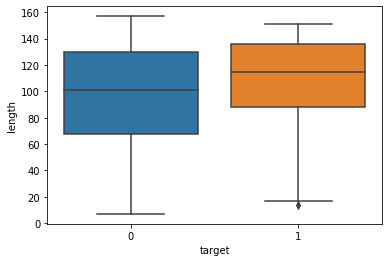

In [67]:
ax = sns.boxplot(x = "target", y="length", data=data)

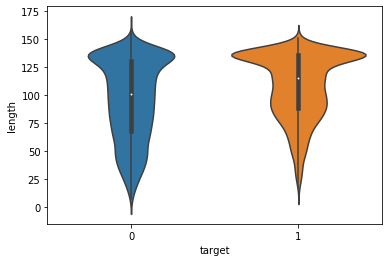

In [68]:
ax = sns.violinplot(x="target", y="length", data=data)

**Análisis de keywords**

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7613 non-null   int64 
 1   keyword     7613 non-null   object
 2   location    7613 non-null   object
 3   text        7613 non-null   object
 4   target      7613 non-null   int64 
 5   length      7613 non-null   int64 
 6   clean_text  7613 non-null   object
dtypes: int64(3), object(4)
memory usage: 416.5+ KB


In [70]:
grouped_by_keyword = data.groupby('keyword').agg({'target':'mean','length':'mean', 'text':'count'}).reset_index()
grouped_by_keyword.columns = ['keyword','target_mean','length_mean', 'count']
grouped_by_keyword

,keyword,target_mean,length_mean,count
0,ablaze,0.361111,94.694444,36
1,accident,0.685714,100.085714,35
2,aftershock,0.000000,101.205882,34
3,airplane accident,0.857143,106.400000,35
4,ambulance,0.526316,98.394737,38
...,...,...,...,...
217,wounded,0.702703,111.054054,37
218,wounds,0.303030,103.363636,33
219,wreck,0.189189,88.540541,37
220,wreckage,1.000000,122.256410,39


In [71]:
#Ordenado por % de reales
ordered_by_target_mean = grouped_by_keyword.sort_values(['target_mean'], ascending = False).head(15)    #juli
ordered_by_target_mean

,keyword,target_mean,length_mean,count
220,wreckage,1.000000,122.256410,39
70,derailment,1.000000,109.794872,39
62,debris,1.000000,107.594595,37
154,outbreak,0.975000,128.925000,40
206,typhoon,0.973684,111.394737,38
153,oil spill,0.973684,102.973684,38
188,suicide bombing,0.969697,108.575758,33
187,suicide bomber,0.967742,109.032258,31
32,bombing,0.931034,102.482759,29
186,suicide bomb,0.914286,119.285714,35


In [72]:
#Ordenado por media de longitud
grouped_by_keyword.sort_values(['length_mean'], ascending = False)

,keyword,target_mean,length_mean,count
167,rescuers,0.914286,129.342857,35
154,outbreak,0.975000,128.925000,40
79,devastation,0.750000,125.722222,36
27,body bag,0.030303,125.393939,33
92,emergency services,0.333333,125.363636,33
...,...,...,...,...
23,blizzard,0.108108,71.891892,37
181,smoke,0.088235,70.882353,34
174,screaming,0.055556,70.472222,36
175,screams,0.142857,70.428571,35


In [73]:
#Ordenado por count
grouped_by_keyword.sort_values(['count'],ascending=False)

,keyword,target_mean,length_mean,count
147,no keyword,0.688525,73.918033,61
104,fatalities,0.577778,108.088889,45
63,deluge,0.142857,111.166667,42
8,armageddon,0.119048,102.023810,42
29,body bags,0.024390,100.780488,41
...,...,...,...,...
115,forest fire,0.789474,99.947368,19
94,epicentre,0.083333,96.750000,12
195,threat,0.181818,99.818182,11
134,inundation,0.200000,94.300000,10


In [74]:
undefined_keywords_veracity = data[data.keyword == 'no keyword'].groupby('keyword').agg({'target':'mean'})       #mora
undefined_keywords_veracity.columns = ['target_mean']
#bajo el nivel??
undefined_keywords_veracity.head()
#promedio de veracidad de los tweets sin keywords:

,target_mean
keyword,
no keyword,0.688525


In [75]:
total_tweets = len(data.index)                                        #mora
total_true_tweets = true_tweets['target'].count()
keyword_group = data.groupby('keyword').agg({'target':'sum'})
keyword_group.columns = ['target_sum']
keyword_group['total_target_percentage'] = (keyword_group['target_sum'] * 100)/total_true_tweets
keyword_group.sort_values(['total_target_percentage'],ascending=False).head(20)
#porcentaje del total de tweets verdaderos según su keyword
#ver si capaz sacarlo porque mi gráfico de barplot de top 15 keywords de verdaderos muestra algo bastante parecido a esto

,target_sum,total_target_percentage
keyword,,
no keyword,42,1.284011
outbreak,39,1.192296
derailment,39,1.192296
wreckage,39,1.192296
typhoon,37,1.131153
debris,37,1.131153
oil spill,37,1.131153
rescuers,32,0.978294
suicide bomb,32,0.978294


In [76]:
#Barplot?

Text(0, 0.5, 'keyword')

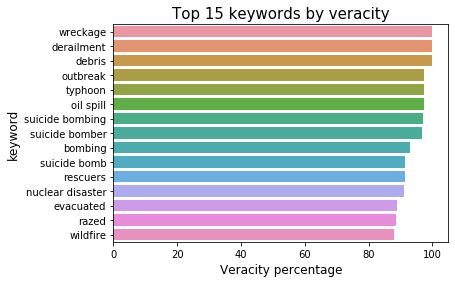

In [77]:
g = sns.barplot(x=ordered_by_target_mean['target_mean']*100, y=ordered_by_target_mean['keyword'], orient='h')
g.set_title("Top 15 keywords by veracity", fontsize=15)                                                       #juli
g.set_xlabel("Veracity percentage", fontsize=12)
g.set_ylabel("keyword", fontsize=12)    

Text(0, 0.5, 'keyword')

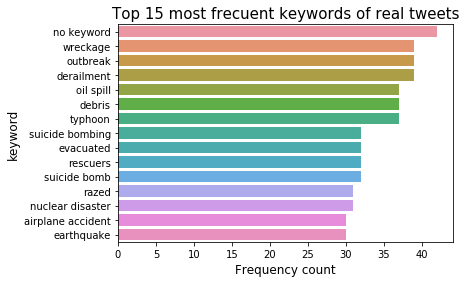

In [78]:
keywords_true_count = true_tweets.keyword.value_counts()          #mora
keywords_false_count = false_tweets.keyword.value_counts()
g = sns.barplot(x=keywords_true_count[:15,].values, y=keywords_true_count[:15,].index, orient='h')
g.set_title("Top 15 most frecuent keywords of real tweets", fontsize=15)
g.set_xlabel("Frequency count", fontsize=12)
g.set_ylabel("keyword", fontsize=12)    #agregado de mora

Text(0, 0.5, 'keyword')

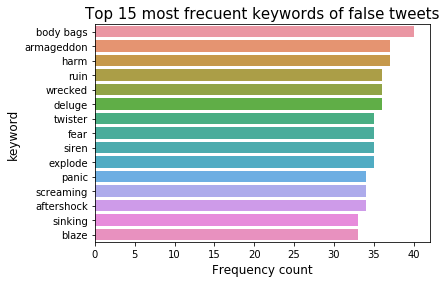

In [79]:
g = sns.barplot(x=keywords_false_count[:15,].values, y=keywords_false_count[:15,].index, orient='h')     #mora
g.set_title("Top 15 most frecuent keywords of false tweets", fontsize=15)
g.set_xlabel("Frequency count", fontsize=12)
g.set_ylabel("keyword", fontsize=12)

Text(0, 0.5, 'Longitud de tweet')

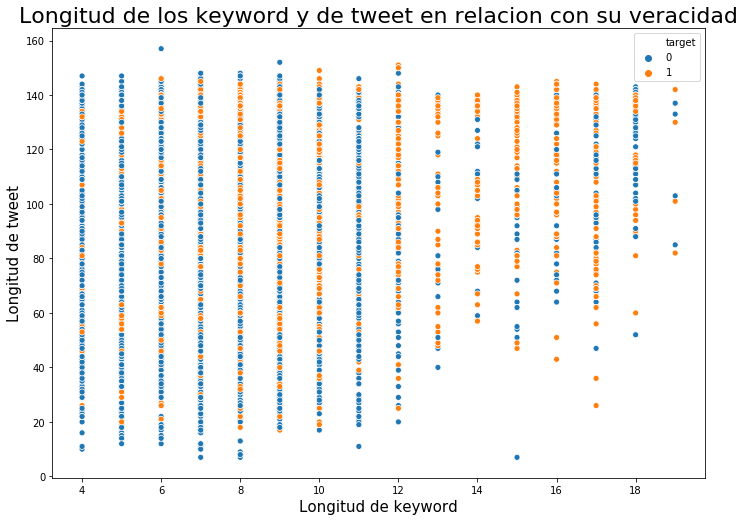

In [80]:
#veracidad segun la longitud keyword                         #YUSSEF
data2 = data
data2['keyword_length'] = data2['keyword'].str.len()
data2 = data2[data2.keyword != 'no keyword']   #no incluimos a los no keyword para este análisis
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.scatterplot(x = "keyword_length", y = "length", hue = "target", data = data2, ax = ax)
g.set_title("Longitud de los keyword y de tweet en relacion con su veracidad", fontsize=22)
g.set_xlabel("Longitud de keyword", fontsize=15)
g.set_ylabel("Longitud de tweet", fontsize=15)

**Análisis de locations**

In [81]:
# Analizamos que datos de los tweets podemos obtener a partir de su Location        #tomi
data['location'].describe()

count            7613
unique           3341
top       no location
freq             2533
Name: location, dtype: object

In [82]:
tweets_by_location = data[data.location != 'no location']['location'].value_counts().sort_values(ascending = False) #mora y tomi 
tweets_by_location

USA                           154
New York                       71
London                         45
Canada                         29
Nigeria                        28
                             ... 
Baton Rouge                     1
Rotterdam, The Netherlands      1
the Refrigerator                1
Alameda and Pleasanton, CA      1
Beirut, Lebanon                 1
Name: location, Length: 3340, dtype: int64

Text(0.5, 1.0, 'Locaciones mas comunes de los tweets')

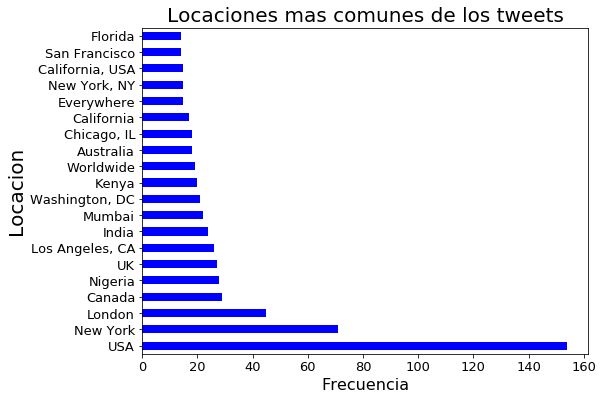

In [96]:
tweets_by_location.iloc[0:20].plot(kind = 'barh', figsize = (8,6), color = 'blue', fontsize = 13)  #tomi
plt.xlabel('Frecuencia', fontsize = 16)
plt.ylabel('Locacion', fontsize = 20)
plt.title('Locaciones mas comunes de los tweets', fontsize  = 20)

Text(0.5, 1.0, 'Locaciones menos comunes de los tweets')

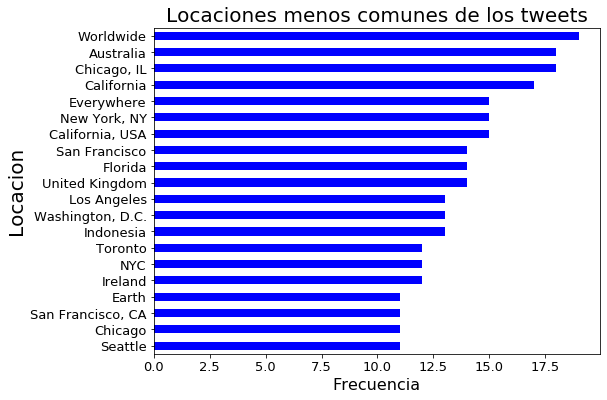

In [97]:
tweets_by_location_with_more_than_10 = tweets_by_location > 10
tweets_by_location[tweets_by_location_with_more_than_10].sort_values(ascending=True).iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'blue', fontsize = 13)
plt.xlabel('Frecuencia', fontsize = 16)   
plt.ylabel('Locacion', fontsize = 20)
plt.title('Locaciones menos comunes de los tweets',fontsize  = 20)

In [94]:
real_tweets_by_location = true_tweets['location'].value_counts().sort_values(ascending=False).drop(labels='no location')
real_tweets_by_location              #tomi

USA                             94
Nigeria                         22
India                           20
Mumbai                          19
London                          16
                                ..
Leeds, UK                        1
Trinidad & Tobago                1
#goingdownthetoilet Illinois     1
Intermountain West               1
Charlotte                        1
Name: location, Length: 1512, dtype: int64

Text(0.5, 1.0, 'Locaciones mas comunes de los tweets reales')

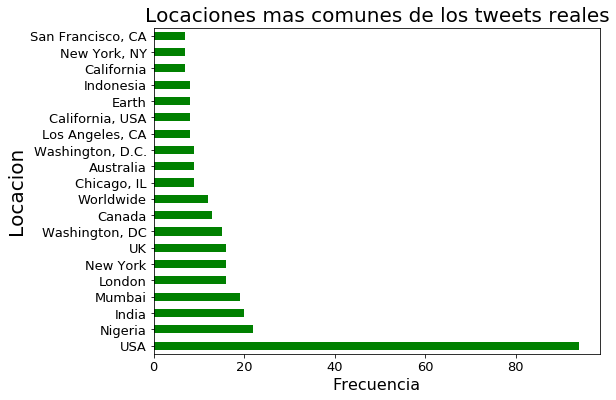

In [98]:
real_tweets_by_location.iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'green', fontsize = 13)
plt.xlabel('Frecuencia',fontsize = 16)                                       #tomi
plt.ylabel('Locacion', fontsize = 20)
plt.title('Locaciones mas comunes de los tweets reales',fontsize  = 20)

In [99]:
fake_tweets_by_location = false_tweets['location'].value_counts().sort_values(ascending=False).drop(labels='no location')
fake_tweets_by_location                             #tomi

USA                         60
New York                    55
London                      29
Los Angeles, CA             18
Canada                      16
                            ..
Newcastle, England           1
??t?a                        1
LA ??                        1
ÌÏT: 19.123127,72.825133     1
Gurgaon, Haryana.            1
Name: location, Length: 2141, dtype: int64

Text(0.5, 1.0, 'Locaciones mas comunes de los tweets falsos')

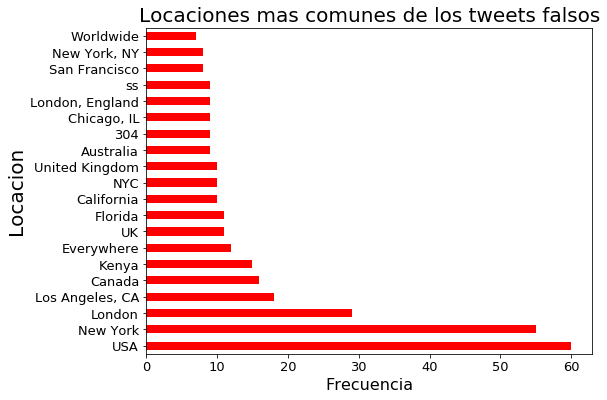

In [100]:
fake_tweets_by_location.iloc[0:20].plot(kind = 'barh',figsize = (8,6), color = 'red', fontsize = 13)
plt.xlabel('Frecuencia', fontsize = 16)                                #tomi
plt.ylabel('Locacion', fontsize = 20)
plt.title('Locaciones mas comunes de los tweets falsos',fontsize  = 20)

In [101]:
tweets_by_loc = data.groupby('location').agg({'target':['sum','count','mean']})      #tomi
tweets_by_loc.columns = ['veracity_sum','veracity_count','veracity_mean']      #ver ke onda con target-veracity
tweets_by_loc.sort_values(by='veracity_sum',ascending=False)

tweets_by_loc = tweets_by_loc.drop(tweets_by_loc[tweets_by_loc['veracity_count'] < 10].index)
tweets_by_loc.sort_values(by='veracity_sum',ascending=False)

,veracity_sum,veracity_count,veracity_mean
location,,,
no location,1075,2533,0.424398
USA,94,154,0.610390
Nigeria,22,28,0.785714
India,20,24,0.833333
Mumbai,19,22,0.863636
London,16,45,0.355556
New York,16,71,0.225352
UK,16,27,0.592593
"Washington, DC",15,21,0.714286


Text(0.5, 1.0, 'Locaciones con el mayor porcentaje de tweets reales')

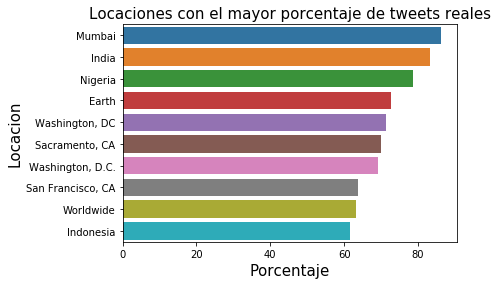

In [106]:
ax = sns.barplot(x=tweets_by_loc['veracity_mean'].nlargest(10) * 100,y=tweets_by_loc['veracity_mean'].nlargest(10).index,orient='h')
ax.set_xlabel("Porcentaje",fontsize = 15)        #tomi
ax.set_ylabel("Locacion",fontsize = 15)
ax.set_title("Locaciones con el mayor porcentaje de tweets reales", fontsize = 15)

Text(0.5, 1.0, 'Locaciones con el menor porcentaje de tweets reales')

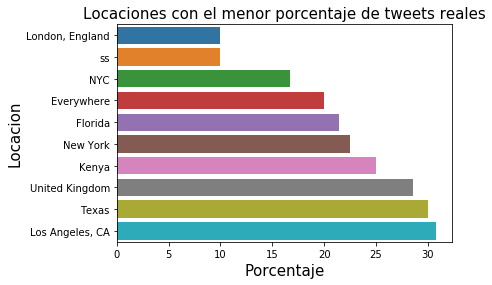

In [107]:
ax = sns.barplot(x=tweets_by_loc['veracity_mean'].nsmallest(10) * 100,y= tweets_by_loc['veracity_mean'].nsmallest(10).index,orient='h')
ax.set_xlabel("Porcentaje",fontsize = 15)        #tomi
ax.set_ylabel("Locacion",fontsize = 15)
ax.set_title("Locaciones con el menor porcentaje de tweets reales", fontsize = 15)

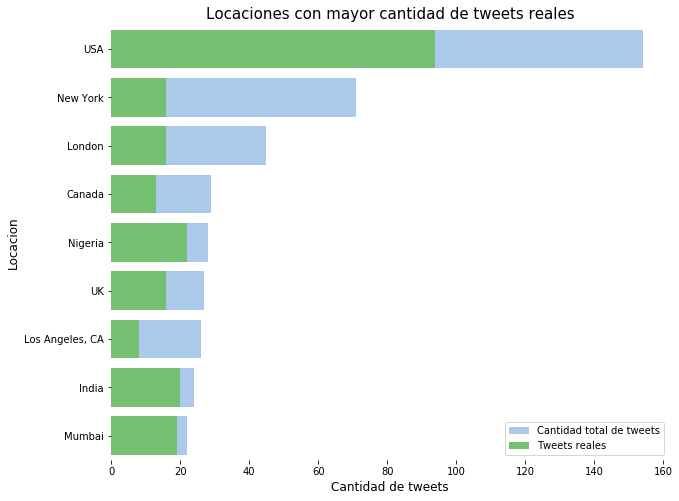

In [111]:
locations_most_tweets = tweets_by_loc['veracity_count'].nlargest(10).index.drop(labels='no location')

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=tweets_by_loc.loc[locations_most_tweets,'veracity_count'], y=locations_most_tweets, color="b",label="Cantidad total de tweets")
sns.set_color_codes("muted")
sns.barplot(x=tweets_by_loc.loc[locations_most_tweets,'veracity_sum'], y=locations_most_tweets, color="g",label="Tweets reales")
sns.set_color_codes("pastel")


ax.set_title("Locaciones con mayor cantidad de tweets reales", fontsize = 15)
ax.set_ylabel("Locacion", fontsize = 12)
ax.set_xlabel("Cantidad de tweets", fontsize = 12)
ax.legend(loc="lower right")
sns.despine(left=True, bottom=True)

In [ ]:
#data['location'] = data['location'].str.replace(',', ' ')       VER BIEN DESPUÉS, DE TOMI (todo el final de su git)
#data['location_words'] = data['location'].str.split()
#new_col_order = ['id','keyword','location','location_words','text', 'veracity','length']
#data = data[new_col_order]
#data.head()

In [ ]:
undefined_locations = data[data.location == 'no location']  #mora
undefined_locations_veracity = undefined_locations.groupby('location').agg({'target':['mean']})
undefined_locations_veracity.columns = ['target_mean']
#bajo el nivel??
undefined_locations_veracity.head()
#promedio de veracidad de los tweets sin locación:

In [ ]:
location_group = data.groupby('location').agg({'target':'sum'})           #mora
location_group.columns = ['target_sum']
location_group['total_target_percentage'] = (location_group['target_sum'] * 100)/total_true_tweets
location_group.sort_values(['total_target_percentage'], ascending=False).head(15)
#porcentaje del total de tweets verdaderos según la locación
#LIMPIAR LOS NOMBRES DE LOCATIONS PARA PODER HACER GRÁFICO DE ESTOS PORCENTAJES

In [ ]:
#Porcentajes de veracidad de top 5 de locaciones con mayor cantidad de tweets                 #YUSSEF
cant_tweet_by_location_by_target=data.loc[ : ].groupby(['location','target']).agg({'target':'count'})
cant_tweet_by_location_by_target.columns=['cantidad']
cant_total_tweet_by_location=cant_tweet_by_location_by_target.groupby('location').transform("sum")
porcentaje=(cant_tweet_by_location_by_target/ cant_total_tweet_by_location)*100
porcentaje=porcentaje.unstack()
porcentaje.columns=['verdadero','falso']
porcentaje=porcentaje.reset_index()
total_por_location=data.loc[:,:].groupby('location')['target'].count().nlargest(5).reset_index()
porcentaje_por_location=pd.merge(total_por_location,porcentaje,how='left',on='location')
porcentaje_por_location=porcentaje_por_location.loc[:,['location','verdadero','falso']]
plot_porcentaje=pd.melt(porcentaje_por_location, id_vars="location",var_name="target" ,value_name="survival rate")
 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.barplot(x='location', y='survival rate', hue='target',data=plot_porcentaje, ax=ax)

g.set_title("Porcentaje de veracidad del top 5 de localizaciones con mayor cantidad de tweet", fontsize=22)
g.set_xlabel("Localizacion", fontsize=15)
g.set_ylabel("Porcentaje segun veracidad", fontsize=15)

In [ ]:
#locaciones con promedio de longitud de tweet verdadero mayor al promedio mundial de tweet verdaderos      #YUSSEF

#promedio mundial de longitud de tweet falsos y verdaderos
meanlength_mundial_false = data.groupby('target').agg({'length':'mean'}).unstack()
meanlength_mundial_true = data.loc[data['target'] == 1,'length'].mean()
meanlength_mundial_false = data.loc[data['target'] == 0,'length'].mean()
mean_by_location_target = data.loc[:].groupby(['location','target']).agg({'length':'mean'})
mean_by_location_target = mean_by_location_target.unstack()
mean_by_location_target.columns = ['meanlenght_falsos','meanlength_verdaderos']
mean_by_location_target = mean_by_location_target.reset_index()
#aca agarro los paises con por lo menos 40 tweet hechos, sino da cualquier 
#resultado(paises con un solo tweet que gana al promedio de verdadero o falso)
boolean_paises_hightcounttweet = data.loc[:].groupby('location')['target'].count() > 20
boolean_paises_hightcounttweet = boolean_paises_hightcounttweet.to_frame().reset_index()['target']
#agrego una columna boolean que calcule antes para filtrar solo paises que sean mayor a 40 tweet
mean_by_location_target['superalos40tweet'] = boolean_paises_hightcounttweet
mean_by_location_target = mean_by_location_target[mean_by_location_target['superalos40tweet']]
#meanlength_mundial_false=data.groupby('target').agg({'length':'mean'}).unstack()
#meanlength_mundial_true=data.loc[data['target']==0,'length'].mean()
mean_by_location_target['meanlength_mundial_falsos'] = meanlength_mundial_false
mean_by_location_target['meanlength_mundial_verdaderos'] = meanlength_mundial_true
mean_by_location_target['pais_meanlength_mayor_prommundial_true'] = mean_by_location_target['meanlength_verdaderos']>mean_by_location_target['meanlength_mundial_verdaderos']
paisesmenmayoralmeanmundial = mean_by_location_target[mean_by_location_target['pais_meanlength_mayor_prommundial_true']]
d = paisesmenmayoralmeanmundial[['location','meanlength_verdaderos','meanlength_mundial_verdaderos']].nlargest(9,'meanlength_verdaderos')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x = 'location', y = 'meanlength_verdaderos', data = d, ax = ax)
g.set_title("Locaciones con promedio de longitud de tweet verdadero mayor al promedio mundial de tweet verdaderos", fontsize=22)
g.set_xlabel("Locaciones",fontsize = 15)
g.set_ylabel("Promedio de longitud de tweet verdaderos", fontsize = 15)

In [ ]:
mean_by_location_target['pais_meanlength_mayor_prommundial_falsos'] = mean_by_location_target['meanlenght_falsos'] > mean_by_location_target['meanlength_mundial_falsos']
paisesmenmayoralmeanmundial = mean_by_location_target[mean_by_location_target['pais_meanlength_mayor_prommundial_falsos']]
d = paisesmenmayoralmeanmundial[['location','meanlenght_falsos','meanlength_mundial_falsos']].nlargest(9,'meanlenght_falsos')

#locaciones con promedio de longitud de tweet verdadero mayor al promedio mundial de tweet verdaderos      #YUSSEF

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x ='location', y = 'meanlenght_falsos', data = d,ax = ax)
g.set_title("Locaciones con promedio de longitud de tweet falsos   mayor al promedio mundial de tweet falsos", fontsize = 22)
g.set_xlabel("Locacion", fontsize = 15)
g.set_ylabel("Promedio de longitud de tweet falsos", fontsize = 15)

**Análisis de texto**

In [ ]:
wordcloud = WordCloud(background_color = "white").generate(' '.join(data['text']))      #Juli
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()
#wordcloud de palabras mas frecuentes en todos los tweets        CON EL TEXTO SIN CAMBIOS

In [ ]:
#Hay muchas url
data[data['text'].str.contains(pat = 'http')]

In [ ]:
#Wordcloud de palabras más frecuentes en tweets verdaderos         CON EL TEXTO SIN CAMBIOS       #Juli
wordcloud = WordCloud(background_color = "white").generate(' '.join(true_tweets['text']))
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()  

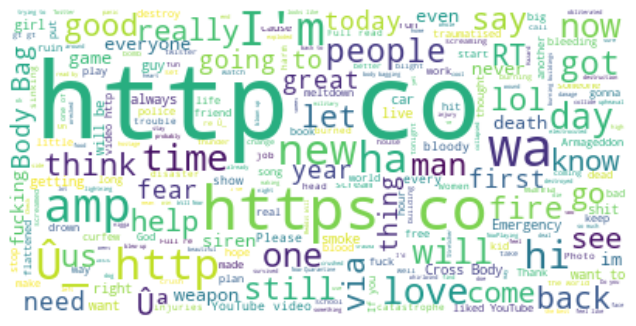

In [293]:
#Wordcloud de palabras mas frecuentes en tweets falsos                 CON EL TEXTO SIN CAMBIOS      #Juli
wordcloud = WordCloud(background_color="white",max_words = 2500).generate(' '.join(false_tweets['text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()  

In [298]:
data['clean_text'] = data['clean_text'].apply(lambda text: re.sub(r'amp | im', '', text))    #juli
#reinicio data_grouped, false_tweets, y true_tweets con el nuevo reemplazo en clean_text
data_grouped = data.groupby('target')        #CAMBIAR DATA POR TWEETS Y TARGET POR VERACITY
false_tweets = data_grouped.get_group(0)
true_tweets = data_grouped.get_group(1)

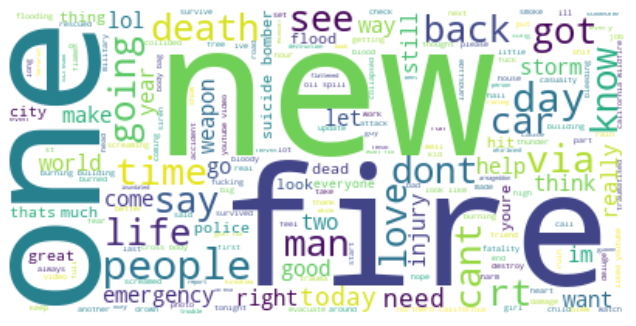

In [299]:
#Wordcloud de palabras mas frecuentes en todos los tweets (reales y falsos) con los tweets "limpios" sin &amp      #Juli
wordcloud = WordCloud(background_color = "white",max_words = 400).generate(' '.join(data['clean_text']))
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

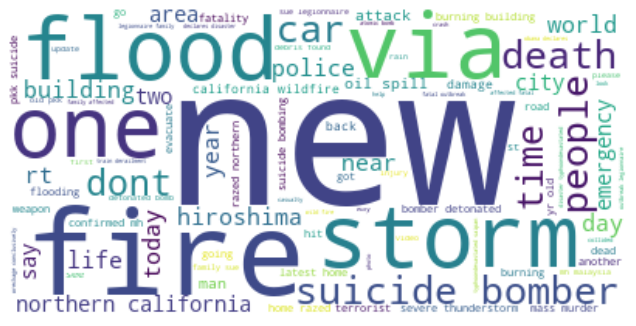

In [259]:
#Wordcloud de palabras más frecuentes en tweets verdaderos con los tweets "limpios"      #Juli
wordcloud = WordCloud(background_color = "white").generate(' '.join(true_tweets['clean_text']))
plt.figure(num = None, figsize = (10, 8), dpi = 80, facecolor = 'w', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

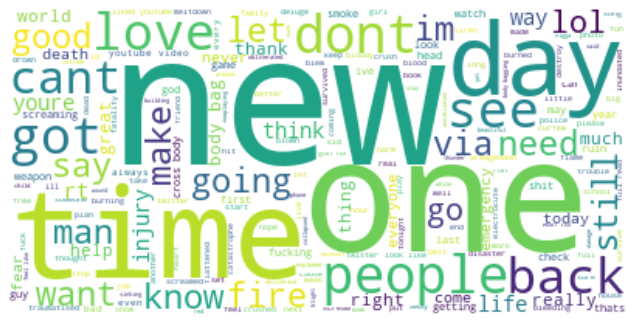

In [260]:
#Wordcloud de palabras más frecuentes en tweets falsos con los tweets "limpios"        #Juli
wordcloud = WordCloud(background_color="white").generate(' '.join(false_tweets['clean_text']))
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

[Text(0, 0, 'Falso'), Text(0, 0, 'Verdadero')]

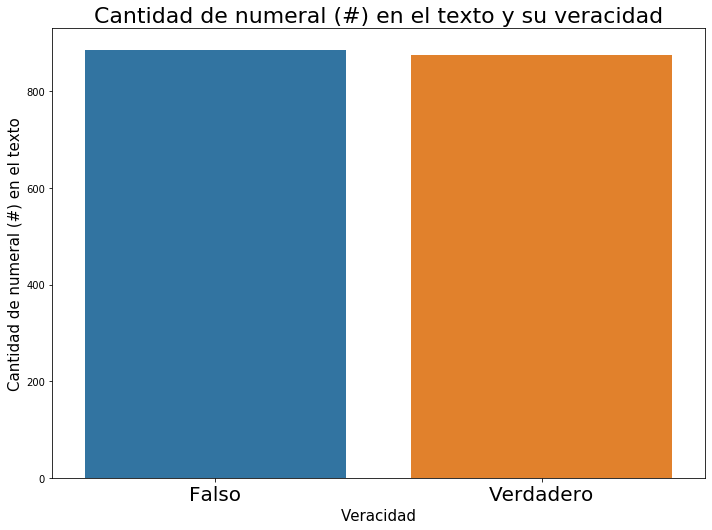

In [289]:
cant_numeral_veracidad = data['text'].str.contains('#').groupby(data['target']).sum().reset_index() #Yussef
cant_numeral_veracidad.columns = ['veracidad','cantidad']
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g = sns.barplot(x = 'veracidad', y = 'cantidad', data=cant_numeral_veracidad, ax = ax)
g.set_title("Cantidad de numeral (#) en el texto y su veracidad", fontsize = 22)
g.set_xlabel("Veracidad",fontsize = 15)
g.set_ylabel("Cantidad de numeral (#) en el texto", fontsize = 15)
g.set_xticklabels(['Falso','Verdadero'], rotation = 'horizontal', fontsize = 20)


[Text(0, 0, 'Falso'), Text(0, 0, 'Verdadero')]

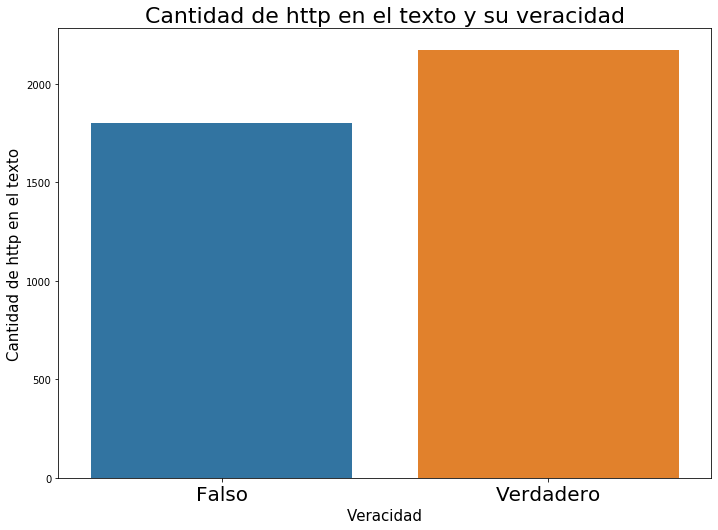

In [277]:
cant_http_veracidad = data['text'].str.contains('http').groupby(data['target']).sum().reset_index()  #Yussef
cant_http_veracidad.columns = ['veracidad','cantidad']
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
 
g = sns.barplot(x = 'veracidad', y = 'cantidad', data = cant_http_veracidad, ax = ax)
g.set_title("Cantidad de http en el texto y su veracidad", fontsize = 22)
g.set_xlabel("Veracidad",fontsize = 15)
g.set_ylabel("Cantidad de http en el texto", fontsize = 15)
g.set_xticklabels(['Falso','Verdadero'], rotation = 'horizontal', fontsize = 20)

In [228]:
grouped_location = data.groupby('location')        
veracity_per_location = grouped_location['target'].mean()
veracity_per_location.head()

location
                          1.0
  Glasgow                 0.0
  Melbourne, Australia    0.0
  News                    1.0
  å_                      0.0
Name: target, dtype: float64

In [229]:
#desviación estándar de longitud de tweets
g_locations = data.groupby('location').agg({'length':'mean'})
g_locations.columns = ['length_mean']
media_aritmetica_length = g_locations['length_mean'].mean()
media_aritmetica_length

99.50029059056222

In [230]:
g_locations['desviacion_cuadrado'] = (g_locations['length_mean'] - media_aritmetica_length)**2
acum = g_locations['desviacion_cuadrado'].sum()
desviacion_estandar = np.sqrt(acum/len(g_locations) - 1)
locations_desviacion_estandar = g_locations[g_locations['length_mean'] > (media_aritmetica_length - desviacion_estandar)]
locations_desviacion_estandar

,length_mean,desviacion_cuadrado
location,,
Glasgow,70.0,870.267145
"Melbourne, Australia",131.0,992.231693
News,135.0,1260.229368
"616 Û¢ Kentwood , MI",124.0,600.235761
? ??????? ? ( ?? å¡ ? ? ? å¡),126.0,702.234599
...,...,...
"ÌÏT: 6.488400524109015,3.352798039832285",136.0,1332.228787
"ÌøåÀå_T: 40.736324,-73.990062",118.0,342.239248
å_: ?? ÌÑ ? : ?,82.0,306.260171


In [231]:
#desviación estándar de cantidad de tweets por locación
locations_tweet_count = data.groupby('location').agg({'id':'count'})
locations_tweet_count.columns = ['tweet_count']
#locations_tweet_count = locations_tweet_count[locations_tweet_count['tweet_count'] > 40]   #con esto cambio q no esten los 1

In [232]:
media_aritmetica_cant = locations_tweet_count['tweet_count'].mean()
media_aritmetica_cant

560.6

In [233]:
locations_tweet_count['desviacion_cuadrado'] = (locations_tweet_count['tweet_count'] - media_aritmetica_cant)**2
acum_cant = locations_tweet_count['desviacion_cuadrado'].sum()
desviacion_estandar_cant = np.sqrt(acum_cant/len(locations_tweet_count) - 1)
locations_desviacion_estandar_cant=locations_tweet_count[locations_tweet_count['tweet_count']>(media_aritmetica_cant-desviacion_estandar_cant)]
locations_desviacion_estandar_cant

,tweet_count,desviacion_cuadrado
location,,
London,45,265843.36
New York,71,239708.16
USA,104,208483.56
United States,50,260712.36
no location,2533,3890361.76


In [234]:
desviacion_estandar_cant

986.4181871802649

In [ ]:
#promedio mundial de longitud de tweet falsos y verdaderos
prom_largo_mundial = data.groupby('target').agg({'length':'mean'}).unstack()
#meanlength_mundial_false=data.groupby('target').agg({'length':'mean'}).unstack()
prom_largo_mundial_V = data.loc[data['target']==1,'length'].mean()
#meanlength_mundial_true=data.loc[data['target']==1,'length'].mean()
prom_largo_mundial_F = data.loc[data['target']==0,'length'].mean()
#meanlength_mundial_false=data.loc[data['target']==0,'length'].mean()